In [3]:
### 라이브러리 호출

from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import re

In [4]:
### 한글 폰트 설정

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

<hr>

<h2>2010 ~ 2021 전국 평균(소계) 그래프 시각화</h2>

<h4>물가지수 자체의 추이와 전력소비량 자체의 추이를 분석하고자 함</h4>

In [5]:
### 물가지수 데이터 DataFrame Load

cpi1 = pd.read_csv("201001_202112_월별_시도별_소비자물가지수.csv", encoding="cp949")
cpi1

,시도별(1),시도별(2),2010.01,2010.02,2010.03,2010.04,2010.05,2010.06,2010.07,2010.08,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
0,전국,소계,85.351,85.523,85.696,86.041,86.128,86.041,86.214,86.647,...,101.84,101.98,102.05,102.05,102.26,102.75,103.17,103.35,103.87,104.04
1,전국,서울특별시,84.055,84.225,84.566,84.906,84.906,84.736,84.991,85.417,...,101.57,101.68,101.74,101.68,101.88,102.33,102.67,102.90,103.20,103.32
2,전국,부산광역시,84.423,84.680,84.937,85.193,85.279,85.108,85.365,85.792,...,101.91,102.00,102.03,101.95,102.19,102.61,103.17,103.22,103.63,103.87
3,전국,대구광역시,84.121,84.377,84.632,84.888,85.058,84.888,85.058,85.399,...,101.99,102.09,102.14,102.12,102.36,102.90,103.43,103.56,104.11,104.30
4,전국,인천광역시,85.588,85.848,86.022,86.456,86.542,86.456,86.716,87.064,...,101.83,102.02,102.08,102.11,102.36,102.94,103.41,103.56,104.06,104.38
5,전국,광주광역시,85.953,86.214,86.563,86.825,86.912,86.912,87.174,87.522,...,101.92,102.13,102.24,102.19,102.36,102.82,103.15,103.27,103.95,104.10
6,전국,대전광역시,86.760,86.848,87.024,87.551,87.639,87.551,87.727,88.255,...,101.90,102.09,102.13,102.19,102.40,102.70,103.08,103.23,103.71,103.97
7,전국,울산광역시,86.572,86.747,87.274,87.537,87.626,87.537,87.713,88.152,...,101.86,101.88,102.00,101.93,102.20,102.71,103.26,103.22,103.86,104.12
8,전국,세종특별자치시,-,-,-,-,-,-,-,-,...,102.05,102.33,102.40,102.48,102.61,103.11,103.20,103.55,104.01,104.16
9,전국,경기도,85.766,86.026,85.854,86.199,86.286,86.199,86.373,86.718,...,101.87,102.01,102.10,102.17,102.33,102.85,103.21,103.43,103.97,104.16


In [6]:
# '소계'를 사용(평균값이므로), 따라서 최종적으로는 전력소비량도 전지역 평균값을 사용함
cpi_total1 = cpi1[cpi1["시도별(2)"] == "소계"]
cpi_total2 = cpi_total1.T # 기간을 좌측으로 오게끔 Transpose
cpi_total3 = cpi_total2.reset_index() # reset_index()로 index 재설정
cpi_total4 = cpi_total3.drop([0,1]) # 0번과 1번 행은 사용하지 않으므로 drop()으로 삭제
cpi_total4

,index,0
2,2010.01,85.351
3,2010.02,85.523
4,2010.03,85.696
5,2010.04,86.041
6,2010.05,86.128
...,...,...
141,2021.08,102.75
142,2021.09,103.17
143,2021.10,103.35
144,2021.11,103.87


In [7]:
# 각 column의 이름을 '기간', '물가지수'으로 설정
cpi_total5 = cpi_total4.rename(columns = {'index' : '기간', 0 : '물가지수'}, inplace = False)
cpi_total5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 2 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      144 non-null    object
 1   물가지수    144 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [8]:
# 물가지수 항목은 소수점이 있으므로 object에서 float로 데이터타입을 변환
cpi_total6 = cpi_total5.astype({'물가지수':'float'})
cpi_total7 = cpi_total6.reset_index() 
cpi_total8 = cpi_total7.drop(columns='index') 
cpi_total8 # 이 변수를 시각화함

,기간,물가지수
0,2010.01,85.351
1,2010.02,85.523
2,2010.03,85.696
3,2010.04,86.041
4,2010.05,86.128
...,...,...
139,2021.08,102.750
140,2021.09,103.170
141,2021.10,103.350
142,2021.11,103.870


In [9]:
### 전력사용량 csv파일 로드
df = pd.read_csv('201001_202112_월별_시도별_전력사용량.csv')

In [10]:
### 1번 항목에서 확인했던 전력소비량 데이터 중에서도 평균값만을 위 cpi_total과 같은 형태로 추출
df_drop = df.drop({'Unnamed: 0', '시도'}, axis=1)
df_drop

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2010,1480180,1382020,1308429,1317499,1185530,1114450,1055938,1088438,1058865,1116695,1297575,1442404
1,2010,8725482,8341902,7574084,7727001,7156767,7152029,7589292,7961584,7659696,6868326,7866013,8452695
2,2010,2922775,2719682,2648326,2665253,2453568,2429359,2550149,2600386,2594082,2428098,2623317,2914222
3,2010,3743904,3471888,3484251,3454660,3321968,3301601,3344445,3428974,3394857,3370268,3498295,3773932
4,2010,712924,682498,632293,642843,603935,605548,667137,697066,692544,605233,632721,685316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021,2844658,2738900,2724005,2670493,2722103,2648105,2856350,3073050,2836764,2726495,2679718,2966246
200,2021,1997136,1830234,1771153,1725471,1667691,1697453,1803462,1923328,1791056,1679464,1736069,1864342
201,2021,518258,503324,450805,461823,430958,437447,486838,544310,495549,446949,438179,473291
202,2021,4434196,4039445,4077387,3876573,3877528,3770865,4137216,4257399,3978322,3855222,4108694,4388778


In [11]:
# 연도 column을 기준으로 그룹화, 동시에 평균값을 dataframe에 출력
df_group = df_drop.groupby('연도').mean()
df_mean = df_group.T # 행렬변환
df_mean

연도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1월,2.335103e+06,2.535240e+06,2.498216e+06,2.616024e+06,2.574024e+06,2.671959e+06,2.625319e+06,2.658644e+06,2.844805e+06,2.861434e+06,2.725112e+06,2.867974e+06
2월,2.188708e+06,2.343108e+06,2.465632e+06,2.411552e+06,2.423945e+06,2.459326e+06,2.562954e+06,2.613082e+06,2.749987e+06,2.609034e+06,2.617551e+06,2.658115e+06
3월,2.091419e+06,2.260802e+06,2.371065e+06,2.323784e+06,2.389529e+06,2.403517e+06,2.485011e+06,2.503443e+06,2.525663e+06,2.534628e+06,2.521800e+06,2.533786e+06
4월,2.115786e+06,2.218604e+06,2.263786e+06,2.294385e+06,2.309050e+06,2.356720e+06,2.360203e+06,2.400651e+06,2.472501e+06,2.496506e+06,2.380894e+06,2.464687e+06
5월,1.988779e+06,2.085555e+06,2.139747e+06,2.203519e+06,2.198684e+06,2.227999e+06,2.249152e+06,2.279053e+06,2.384145e+06,2.394589e+06,2.254566e+06,2.402487e+06
6월,1.989683e+06,2.102778e+06,2.152759e+06,2.197991e+06,2.226014e+06,2.254742e+06,2.333418e+06,2.333686e+06,2.414450e+06,2.389401e+06,2.338405e+06,2.472463e+06
7월,2.090517e+06,2.193162e+06,2.243204e+06,2.304199e+06,2.352646e+06,2.316382e+06,2.387664e+06,2.541676e+06,2.589997e+06,2.527423e+06,2.474575e+06,2.704223e+06
8월,2.191269e+06,2.256481e+06,2.346241e+06,2.391003e+06,2.354869e+06,2.466411e+06,2.612461e+06,2.667867e+06,2.913653e+06,2.797555e+06,2.623483e+06,2.878233e+06
9월,2.131955e+06,2.168204e+06,2.227551e+06,2.281235e+06,2.244794e+06,2.335535e+06,2.423760e+06,2.490357e+06,2.572296e+06,2.567605e+06,2.653576e+06,2.636405e+06
10월,1.973165e+06,2.094313e+06,2.052624e+06,2.173317e+06,2.224439e+06,2.203005e+06,2.267599e+06,2.256988e+06,2.351616e+06,2.389578e+06,2.297959e+06,2.461072e+06


In [12]:
df_mean.columns

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='연도')

In [13]:
df_reset = df_mean.reset_index()

In [14]:
# 데이터를 세로로 이어붙이기(melt 사용)
df_melt = pd.melt(df_reset,
                    id_vars=['index'],
                    value_vars=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
df_melt

,index,연도,value
0,1월,2010,2.335103e+06
1,2월,2010,2.188708e+06
2,3월,2010,2.091419e+06
3,4월,2010,2.115786e+06
4,5월,2010,1.988779e+06
...,...,...,...
139,8월,2021,2.878233e+06
140,9월,2021,2.636405e+06
141,10월,2021,2.461072e+06
142,11월,2021,2.519389e+06


In [15]:
# 연도 column 삭제
df_drop2 = df_melt.drop('연도', axis=1)
df_type = df_drop2.astype({'value':'int64'})

In [16]:
df_type = df_type.rename(columns={'index':'기간', 'value':'전력소비량'})
df_type

,기간,전력소비량
0,1월,2335102
1,2월,2188707
2,3월,2091419
3,4월,2115785
4,5월,1988778
...,...,...
139,8월,2878232
140,9월,2636404
141,10월,2461071
142,11월,2519389


In [17]:
### 두 데이터프레임 합치기

df_con1 = df_type.rename(columns={'index' : '기간', 'value' : '전력소비량'}, inplace=False)
df_con2 = df_con1['전력소비량']
result = pd.concat([cpi_total8,df_con2],axis=1)
result ### 시각화 대상 변수

,기간,물가지수,전력소비량
0,2010.01,85.351,2335102
1,2010.02,85.523,2188707
2,2010.03,85.696,2091419
3,2010.04,86.041,2115785
4,2010.05,86.128,1988778
...,...,...,...
139,2021.08,102.750,2878232
140,2021.09,103.170,2636404
141,2021.10,103.350,2461071
142,2021.11,103.870,2519389


In [18]:
result.to_csv('기간_물가지수_전력소비량.csv')
df_type.to_csv('기간_전력소비량.csv')
cpi_total8.to_csv('기간_물가지수.csv')

<hr>

<h1>평균 전력소비량 추이 VS 평균 물가지수 추이 시각화</h1>

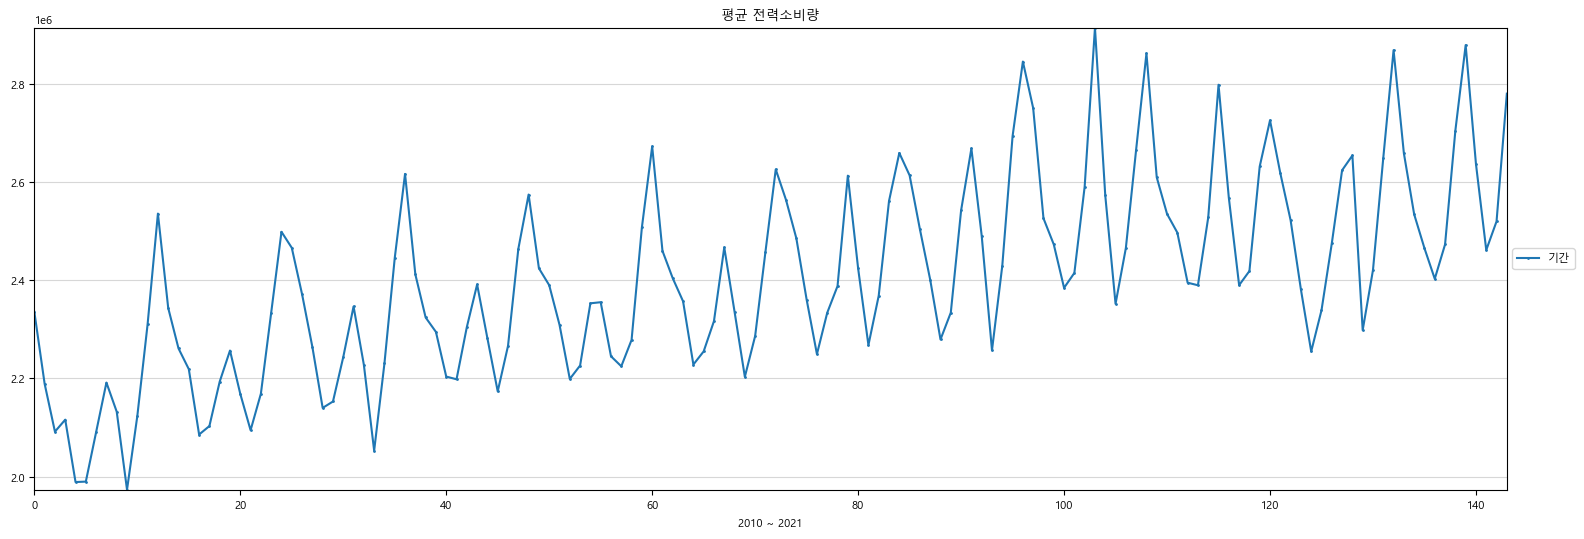

In [19]:
# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df_type["전력소비량"], marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df_type.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('평균 전력소비량')

# x축 레이블 설정
plt.xlabel('2010 ~ 2021')

# y축 레이블 설정
# plt.ylabel('')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()

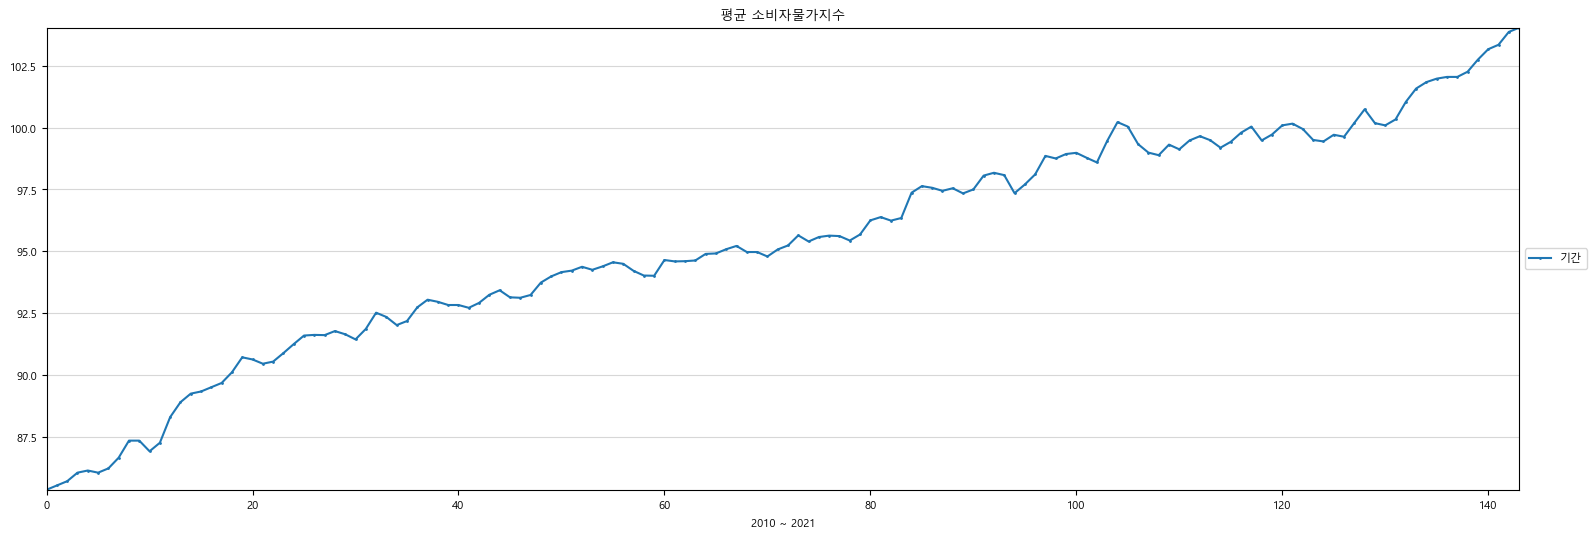

In [20]:
# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(cpi_total8["물가지수"], marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(cpi_total8.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('평균 소비자물가지수')

# x축 레이블 설정
plt.xlabel('2010 ~ 2021')

# y축 레이블 설정
# plt.ylabel('')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()

<h3> 개별적으로 출력하는 것은 아무래도 가독성이 떨어지므로 subplots로 표현 </h3>

In [21]:
plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus']=False

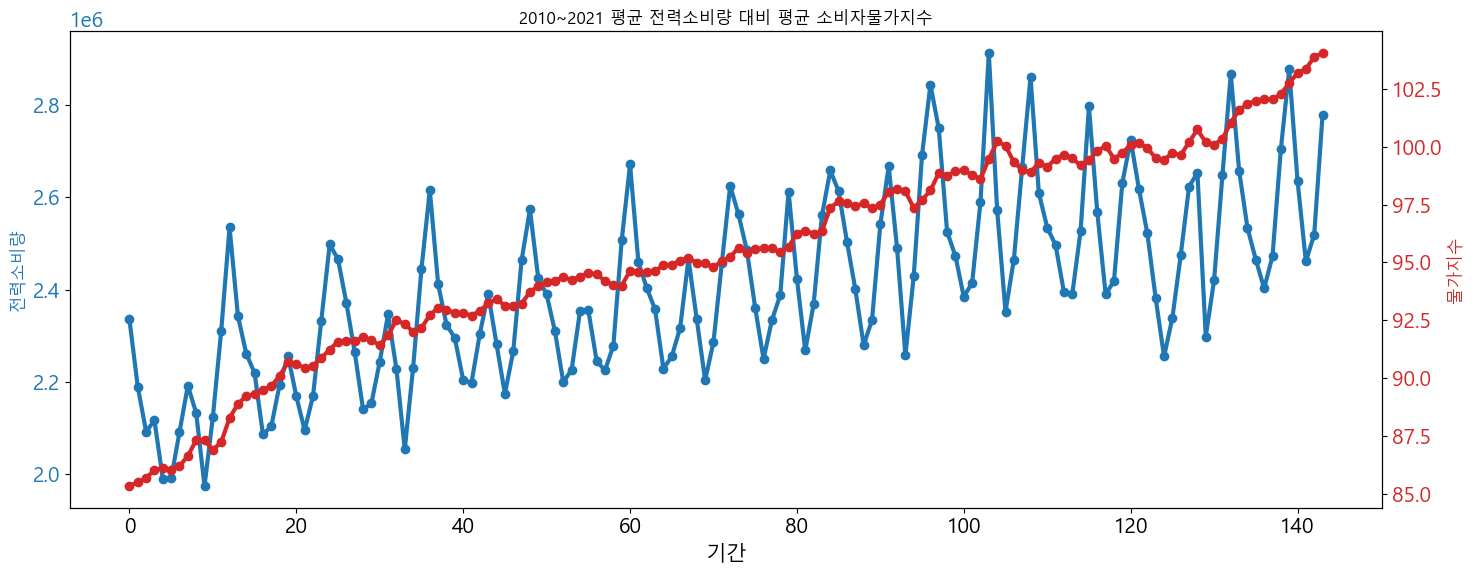

In [22]:
fig, ax1 = plt.subplots(figsize=(15,6),nrows=1,ncols=1)

color_1 = 'tab:blue'
ax1.set_title('2010~2021 평균 전력소비량 대비 평균 소비자물가지수', fontsize=12)
ax1.set_xlabel('기간')
ax1.set_ylabel('전력소비량', fontsize=12, color=color_1)
ax1.plot(result.index, result.전력소비량 , marker='o', color=color_1,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color_1)


ax2 = ax1.twinx() 
color_2 = 'tab:red'
ax2.set_ylabel('물가지수', fontsize=12, color=color_2)
ax2.plot(result.index, result.물가지수, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()